<a href="https://colab.research.google.com/github/nimz97/Web-and-social-media-analytics/blob/main/Solution%2BPart_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information. 
We begin by unzipping the meta data file and extracting its content to a list



# Reading the  data



In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/sentiment_analysis/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/MyDrive/sentiment_analysis/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [ ]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


We need only cellphone category for our analysis so we can extract those rows related to that category. 

In [ ]:
df_meta["category_clphn"] = [l[1] if len(l) > 0 else np.nan for l in df_meta["category"]]

In [ ]:
df_celphonemeta= df_meta[df_meta["category_clphn"] == "Cell Phones"]

In [ ]:
df_celphonemeta.to_csv('/content/drive/My Drive/cellphone_meta.csv')

In [ ]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/My Drive/sentiment_analysis/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_phonedata.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE


# Data pre-processing



In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


# EDA

In [ ]:
#inspecting the dataframe
df_phonedata.head(3)


,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE,2014-02-07


In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [ ]:
#checking no. of rows and columns in the dataframe
df_phonedata.shape

(1128437, 13)

So the dataframe has 1128437 rows and 13 columns.

In [ ]:
#checking for null values in the dataset
round(100*(df_phonedata.isnull().sum()/df_phonedata.index.size), 2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style               46.36
reviewerName         0.01
reviewText           0.07
summary              0.05
unixReviewTime       0.00
vote                91.84
image               97.60
review_sentiment     0.00
Date&Time            0.00
dtype: float64

There are more than 90% of null values in image and vote and also there are more than 46% null values in style. So we can remove those columns.

In [ ]:
df_phonedata.drop(['style','vote','image'], axis=1, inplace = True)

In [ ]:
# we can remove the rows where the column reviewText have null values
df_phonedata = df_phonedata[df_phonedata['reviewText'].notna()]

In [ ]:
# checking again for null values
round(100*(df_phonedata.isnull().sum()/df_phonedata.index.size), 2)

overall             0.00
verified            0.00
reviewerID          0.00
asin                0.00
reviewerName        0.01
reviewText          0.00
summary             0.04
unixReviewTime      0.00
review_sentiment    0.00
Date&Time           0.00
dtype: float64

**Inspecting metadata**

In [ ]:
df_metadata = pd.read_csv('/content/drive/MyDrive/cellphone_meta.csv')

In [ ]:
#checking the shape of the data
df_metadata.shape

(9823, 20)

In [ ]:

df_metadata.head(3)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_clphn
0,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR,Cell Phones
2,1295,"['Cell Phones & Accessories', 'Cell Phones']",NaN,"[""The Nokia 5180i is a handset offered by Trac...",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4,Cell Phones


In [ ]:
# we can drop category since we have made a new column and also unnamed:0 column
# since it doesnt have any relevance in further analysis 
df_metadata.drop(['category','Unnamed: 0'],axis=1, inplace = True)

In [ ]:
df_metadata.head()

,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_clphn
0,NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1,NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR,Cell Phones
2,NaN,"[""The Nokia 5180i is a handset offered by Trac...",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4,Cell Phones
3,NaN,"['Based on Motorola&#x92;s i90c phone, the i95...",NaN,Motorola i95cl Phone (Nextel),[],['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,[],"['>#3,798,962 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006J9HH,Cell Phones
4,NaN,['This is a GSM Samsung R225 cellular phone th...,NaN,T-Mobile Dual-Band Wireless Phone,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006LIQB,Cell Phones


In [ ]:
#checking for duplicated files
len(df_metadata[df_metadata.duplicated()])

34

There are 34 duplicate rows in the data.

In [ ]:
# removing duplicates from the data
df_metadata= df_metadata.drop_duplicates()

In [ ]:
df_metadata['rank'].isna().sum()

0

In [ ]:
# checking for blanks in rank column
df_metadata[df_metadata["rank"]=='[]']["rank"].count()

191

In [ ]:
#checking for null values in the dataset
round(100*(df_metadata.isnull().sum()/df_metadata.index.size), 2)

tech1              99.68
description         0.00
fit               100.00
title               0.00
also_buy            0.00
image               0.00
tech2              99.91
brand               1.26
feature             0.00
rank                0.00
also_view           0.00
details             0.00
main_cat            0.14
similar_item       70.04
date               97.59
price              82.19
asin                0.00
category_clphn      0.00
dtype: float64

In [ ]:
#checking price column
df_metadata['price'].value_counts()

$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# changing the descriptive data into null
df_metadata['price']=[np.nan if len(str(x))>10 else x for x in df_metadata['price']]

<ipython-input-32-4acf523ffe53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata['price']=[np.nan if len(str(x))>10 else x for x in df_metadata['price']]


In [ ]:
#checking the changed datatype.
df_metadata.price.value_counts()

$40.08     133
$27.57     129
$16.00      44
$49.99      38
$54.99      30
          ... 
$159.06      1
$82.00       1
$272.98      1
$37.28       1
$75.24       1
Name: price, Length: 722, dtype: int64

In [ ]:
# removing the dollar value from price column
df_metadata['price'] = df_metadata['price'].str.replace('$','')

<ipython-input-34-c79328fba562>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_metadata['price'] = df_metadata['price'].str.replace('$','')


In [ ]:
# removing the dollar value from price column
df_metadata['price'] = df_metadata['price'].str.replace(',','')

In [ ]:
df_metadata['price'].isnull().sum()

8092

We can check null values and prices of different brands and then impute those values by thier mean values.

In [ ]:
#convert price to float so that we can impute null values by mean
df_metadata["price"] = df_metadata["price"].astype("float")

In [ ]:
df_metadata[df_metadata["price"].isnull()]["brand"].value_counts()

Samsung         1209
LG               616
Motorola         591
Nokia            452
BLU              440
                ... 
Social Drive       1
MYSAGA             1
GoPro              1
LSoug              1
BEISTE             1
Name: brand, Length: 873, dtype: int64

In [ ]:
#we can impute null values by mean of their brand.
df_metadata['price'] = df_metadata['price'].fillna(df_metadata.groupby('brand')['price'].transform('mean'))

In [ ]:

# we can delete those columns with morethan 30% of null values
round(100*(df_metadata.isnull().sum()/df_metadata.index.size), 2)

tech1              99.68
description         0.00
fit               100.00
title               0.00
also_buy            0.00
image               0.00
tech2              99.91
brand               1.26
feature             0.00
rank                0.00
also_view           0.00
details             0.00
main_cat            0.14
similar_item       70.04
date               97.59
price              22.10
asin                0.00
category_clphn      0.00
dtype: float64

Here tech1, fit, tech2, similar_item, date are those columns with more
than 30% of null values. So we can remove those columns.And also we can remove main_cat since we are only dealing with cellphones.



In [ ]:
df_metadata.drop(['tech1', 'tech2', 'fit', 'date', 'similar_item','main_cat'], axis = 1, inplace = True)

In [ ]:
#remove those those rows without price value
df_metadata = df_metadata[df_metadata['price'].notna()]


In [ ]:
df_metadata.columns

Index(['description', 'title', 'also_buy', 'image', 'brand', 'feature', 'rank',
       'also_view', 'details', 'price', 'asin', 'category_clphn'],
      dtype='object')

In [ ]:
# we can drop image column since we are not using it further for our text analytics
df_metadata.drop(['image'], axis=1, inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# checking rank column
df_metadata['rank'].value_counts()

[]                                                                                                                                                         152
['>#1,586,517 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#15,751 in Cell Phones & Accessories > Unlocked Cell Phones']      7
['>#1,585,650 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#15,750 in Cell Phones & Accessories > Unlocked Cell Phones']      5
['>#315,838 in Cell Phones & Accessories (See top 100)', '>#933 in Cell Phones & Accessories > Carrier Cell Phones']                                         4
['>#1,586,127 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#15,748 in Cell Phones & Accessories > Unlocked Cell Phones']      4
                                                                                                                                                          ... 
['>#5,124,787 in Cell Phones & Accessories (Se

In [ ]:
# we can extract rank  alone from the rank column 
df_metadata['nw_rank']=df_metadata['rank'].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]


In [ ]:
df_metadata['nw_rank']=df_metadata['nw_rank'].str.replace('>#','').str.replace('in Cell Phones & Accessories','').str.replace(',','')


In [ ]:
df_metadata['nw_rank'] = df_metadata['nw_rank'].astype('float')

In [ ]:
#remove those those rows without rank
df_metadata = df_metadata[df_metadata['nw_rank'].notna()]

In [ ]:
df_metadata.shape

(7333, 12)

In [ ]:
df_metadata[df_metadata['rank'].notnull()]


,description,title,also_buy,brand,feature,rank,also_view,details,price,asin,category_clphn,nw_rank
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (Se...",[],{},117.247465,B00006LIQB,Cell Phones,5552033.0
5,"['Dark Blue OEM faceplate, Wall charger and ba...",Unlocked Nokia 8290,[],Nokia,"['Modes GSM 1900, 2-way Text Messaging', 'MMS:...","['>#6,167,064 in Cell Phones & Accessories (Se...",[],{},92.513680,B00008KGAG,Cell Phones,6167064.0
6,['This is the ruggedized version of the i50sx ...,Motorola i58sry Yellow Phone (Nextel),[],Motorola,"['iDEN 800', 'GPS capable', 'Push-to-talk']","['>#2,703,779 in Cell Phones & Accessories (Se...",[],{},69.264778,B00008NFA3,Cell Phones,2703779.0
8,"['Battery and all accessories included, except...",Motorola Model T722i Flip Phone,[],Motorola,['2 of many of the accessories are included.'],"['>#4,397,029 in Cell Phones & Accessories (Se...",[],{},69.264778,B00009PGN0,Cell Phones,4397029.0
10,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",[],{},117.247465,B0000E3GWH,Cell Phones,3059436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9816,['Introducing the 7.0 inch Android 4.4 KitKat ...,Indigi UNLOCKED! Indigi A76 7&quot; Tablet PC/...,[],inDigi,['2-in-1 TabletPC and SmartPhone 7.0 Inch Dis...,"['>#1,720,227 in Cell Phones & Accessories (Se...","['B0749Y4TXV', 'B00EJXK10I', 'B07BC9B6Q5', 'B0...",{},27.570000,B01HHDLN3A,Cell Phones,1720227.0
9818,"[""This is a New (Other) item with REAL PHOTOS ...",Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,[],Samsung,['This Certified Refurbished product is factor...,"['>#1,391,884 in Cell Phones & Accessories (Se...",[],{},117.247465,B01HIMOY5O,Cell Phones,1391884.0
9819,['The new Xperia Z3 has the highest waterproof...,Sony Xperia Z C6616 Unlocked GSM 4G LTE WaterP...,[],Sony,"['2G: 850 / 900 / 1800 / 1900, 3G: HSDPA 850 /...","['>#1,300,328 in Cell Phones & Accessories (Se...",[],{},136.380164,B01HIQ9DMY,Cell Phones,1300328.0
9821,['<b>NOTE: US customized 4G version Doogee Val...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,[],DOOGEE,['US CUSTEMIZED VERSION GSM 850/900/1800/1900M...,"['>#641,944 in Cell Phones & Accessories (See ...",[],{},27.570000,B01HJ9X65A,Cell Phones,641944.0


In [ ]:
# we can remove the rank column since we have created new rank column.
df_metadata.drop(['rank'], axis=1, inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


From also_view column we have to take just brands and create a new column on it.

In [ ]:
df_metadata.also_view

4                                                      []
5                                                      []
6                                                      []
8                                                      []
10                                                     []
                              ...                        
9816    ['B0749Y4TXV', 'B00EJXK10I', 'B07BC9B6Q5', 'B0...
9818                                                   []
9819                                                   []
9821                                                   []
9822                                                   []
Name: also_view, Length: 7333, dtype: object

In [ ]:
df_metadata=df_metadata.assign(also_view_new=df_metadata.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'','').str.split(','))

<ipython-input-54-9d5c1f07d004>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_metadata=df_metadata.assign(also_view_new=df_metadata.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'','').str.split(','))


In [ ]:
# function to get brand name from the list of also_view

def get_brand(l):
    b_list=[]
    brand=''
    for i in range(0,len(l)):
        b=df_metadata[df_metadata["asin"]==l[i]]["brand"]
    
        if len(b)>0:
            brand=b.values[0]
            if brand not in b_list:
                b_list.append(brand)
    
    return b_list

In [ ]:
df_metadata['brand_also_view']= [get_brand(l) if len(l) > 0 else np.nan for l in df_metadata['also_view_new']]

In [ ]:
#So we can remove the columns also_view and and also_view_new
df_metadata.drop(['also_view','also_view_new'], axis=1, inplace=True)

In [ ]:
#we can check the dataset
df_metadata.head(3)

,description,title,also_buy,brand,feature,details,price,asin,category_clphn,nw_rank,brand_also_view
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],{},117.247465,B00006LIQB,Cell Phones,5552033.0,[]
5,"['Dark Blue OEM faceplate, Wall charger and ba...",Unlocked Nokia 8290,[],Nokia,"['Modes GSM 1900, 2-way Text Messaging', 'MMS:...",{},92.513680,B00008KGAG,Cell Phones,6167064.0,[]
6,['This is the ruggedized version of the i50sx ...,Motorola i58sry Yellow Phone (Nextel),[],Motorola,"['iDEN 800', 'GPS capable', 'Push-to-talk']",{},69.264778,B00008NFA3,Cell Phones,2703779.0,[]


Cleaned dataset is ready so that we can merge df_metadata with phonedata

**Merging the dataframe**

In [ ]:
merged_data = pd.merge(df_phonedata, df_metadata, how= 'inner',on= ['asin'])

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59416 entries, 0 to 59415
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           59416 non-null  float64
 1   verified          59416 non-null  bool   
 2   reviewerID        59416 non-null  object 
 3   asin              59416 non-null  object 
 4   reviewerName      59407 non-null  object 
 5   reviewText        59416 non-null  object 
 6   summary           59400 non-null  object 
 7   unixReviewTime    59416 non-null  int64  
 8   review_sentiment  59416 non-null  object 
 9   Date&Time         59416 non-null  object 
 10  description       59416 non-null  object 
 11  title             59416 non-null  object 
 12  also_buy          59416 non-null  object 
 13  brand             59397 non-null  object 
 14  feature           59416 non-null  object 
 15  details           59416 non-null  object 
 16  price             59416 non-null  float6

In [ ]:
# converting the column verified having boolean values with 0 and 1
merged_data['verified'].replace({False : 0 , True : 1}, inplace = True)

In [ ]:
merged_data.isnull().sum()

overall              0
verified             0
reviewerID           0
asin                 0
reviewerName         9
reviewText           0
summary             16
unixReviewTime       0
review_sentiment     0
Date&Time            0
description          0
title                0
also_buy             0
brand               19
feature              0
details              0
price                0
category_clphn       0
nw_rank              0
brand_also_view      0
dtype: int64

In [ ]:
merged_data.verified.value_counts()

1    51184
0     8232
Name: verified, dtype: int64

In [ ]:
%pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 14.8 MB/s 


In [ ]:
# convert merged data into excel file and save it
merged_data.to_excel('/content/drive/My Drive/merged_data.xlsx',engine= 'xlsxwriter')

**Visualisation of review_sentiment**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

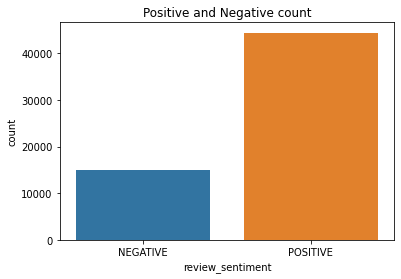

In [ ]:
plt.title("Positive and Negative count")
sns.countplot(merged_data['review_sentiment'])
plt.show()

Positive reviews are high in comparison with negative.

In [ ]:
#Counting negative and positive reviews
reviews = merged_data.review_sentiment.value_counts()
reviews

POSITIVE    44430
NEGATIVE    14986
Name: review_sentiment, dtype: int64

**Checking review sentiment on overall rating**

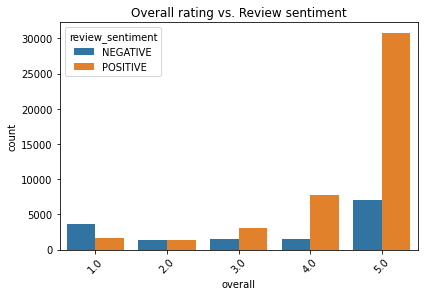

In [ ]:
plt.figure()
sns.countplot(data=merged_data,x=merged_data['overall'],hue=merged_data['review_sentiment'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Overall rating vs. Review sentiment')
plt.show()

As expected rating 1 has more negative reviews compairing with others.

**Top 10 Brands with respect to review sentiment**

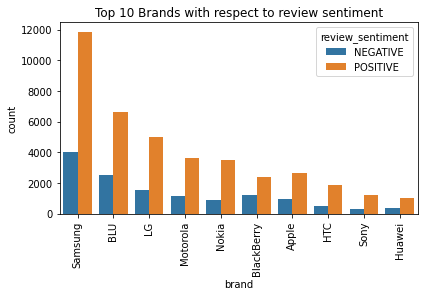

In [ ]:
plt.figure()
sns.countplot(data=merged_data,x=merged_data['brand'],hue=merged_data['review_sentiment'],order=merged_data['brand'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Top 10 Brands with respect to review sentiment')
plt.show()

**Top 10 Brands with respect to Rank**

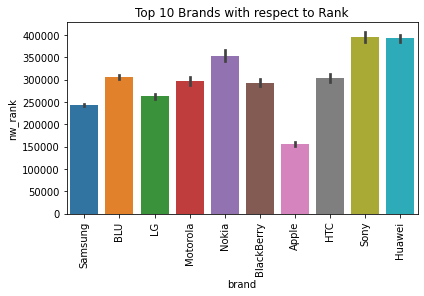

In [ ]:
plt.figure()
sns.barplot (data=merged_data,x=merged_data['brand'],y=merged_data['nw_rank'],order=merged_data['brand'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Top 10 Brands with respect to Rank')
plt.show()

* Top brand based on rank is Sony.

**Checking reviews based on whether it is verified or not**

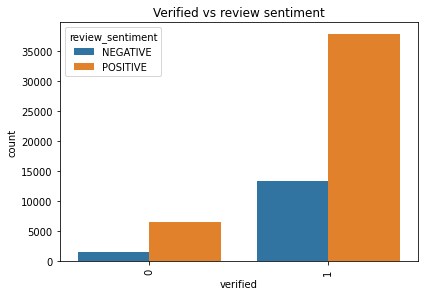

In [ ]:
plt.figure()
sns.countplot(data=merged_data,x=merged_data['verified'],hue=merged_data['review_sentiment'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Verified vs review sentiment')
plt.show()

* Almost every reviews are verified.

**Price distribution among top 10 Brands.**

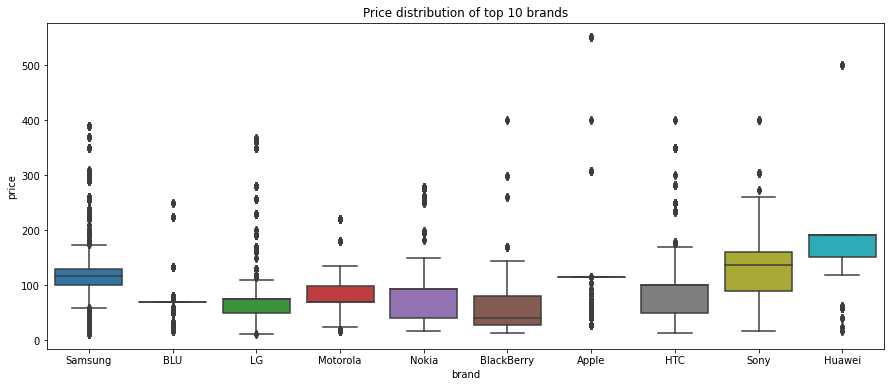

In [ ]:
plt.figure(figsize=[15,6])
plt.title('Price distribution of top 10 brands')
sns.boxplot(data=merged_data,x='brand',y='price',order=merged_data['brand'].value_counts().iloc[:10].index)
plt.show()

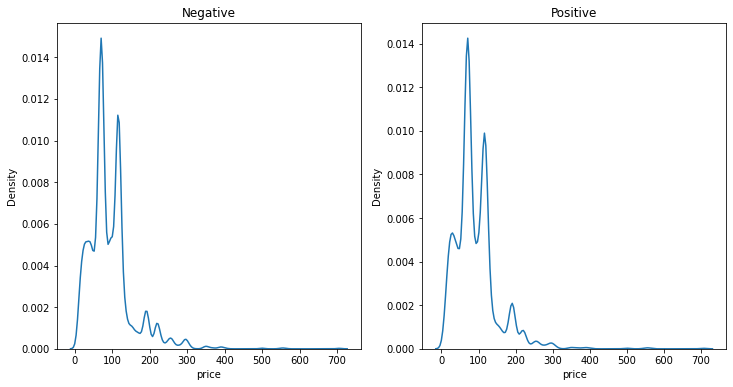

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title='Negative')
ax2 = fig.add_subplot(1, 2, 2, title='Positive')

sns.kdeplot(merged_data[merged_data['review_sentiment'] == 'POSITIVE']['price'], ax=ax1)
sns.kdeplot(merged_data[merged_data['review_sentiment'] == 'NEGATIVE']['price'], ax=ax2)

plt.show()

# Text Analytics

In [ ]:
# importing libraries
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

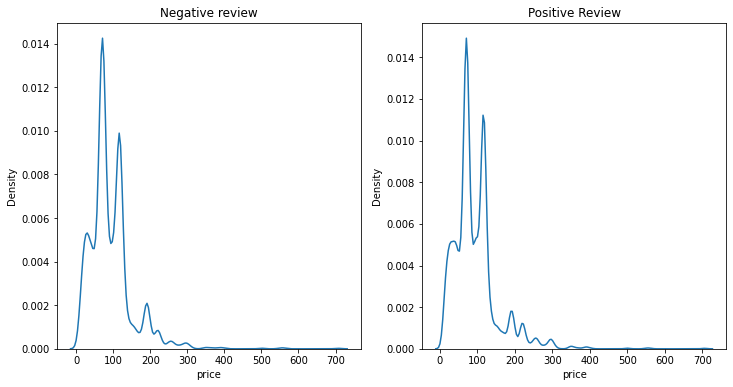

In [ ]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 2, title='Positive Review')
ax2 = fig.add_subplot(1, 2, 1, title='Negative review')

sns.kdeplot(merged_data[merged_data['review_sentiment'] == 'POSITIVE']['price'], ax=ax1)
sns.kdeplot(merged_data[merged_data['review_sentiment'] == 'NEGATIVE']['price'], ax=ax2)

plt.show()

* Negative and positive reviews are high in 50-120 range.

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/sentiment_analysis/stop_words_long.txt')]

In [ ]:
# Reading negative and positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/sentiment_analysis/pos_words.txt')]
negative_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/sentiment_analysis/neg_words.txt')]

 **Removing stop words**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# function for removing stop words

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(docment):
    # change sentence to lower case
    docment = docment.lower()
    # tokenize into words
    words = word_tokenize(docment)
    # remove stop words
    words = [word for word in words if word not in stop_words]
    # take only thos words whose length is greater than 2 since we need word no for further analysis
    words=[w for w in words if len(w)>2]    
    # join words to make sentence
    docment = " ".join(words)
    
    return docment

In [ ]:
# function to remove positive / negative words from document
def remove_post_neg(docment):
   # tokenize into words
    words = word_tokenize(docment)
    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]
    docment = " ".join(words)
    
    return docment

In [ ]:
# function to remove punctuations
def punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    return text

In [ ]:
#function for lemmatisation
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatization(document):
    document = document.lower()              
    words = word_tokenize(document)
                                                        
    words = [word for word in words if word not in stop_words]
           
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    words=[w for w in words if len(w)>2]
    
    document = " ".join(words)
    
    return document

In [ ]:
#making a new dataframe for reviews and sentiment analysis
reviews_sentiment= merged_data[['reviewText','review_sentiment']]

In [ ]:
#removing stop words 
reviews_sentiment['reviewText_nostop'] = [preprocess(x) for x in reviews_sentiment['reviewText']]

In [ ]:
# removing positive and negative words and punctuations to get most importanat features.
reviews_sentiment['reviewText_nostop'] = [remove_post_neg(x) for x in reviews_sentiment['reviewText_nostop']]
reviews_sentiment['reviewText_nostop'] = reviews_sentiment['reviewText_nostop'].apply(punctuations)

In [ ]:
#apply lemmatisation
reviews_sentiment['reviewText_nostop'] = [lemmatization(x) for x in reviews_sentiment['reviewText_nostop']]

In [ ]:
# deviding positive and negative review in different dataframe to create word cloud
positive_data = reviews_sentiment[reviews_sentiment['review_sentiment']=='POSITIVE'][['reviewText_nostop','review_sentiment']]
negative_data = reviews_sentiment[reviews_sentiment['review_sentiment']=='NEGATIVE'][['reviewText_nostop','review_sentiment']]

In [ ]:
#checking some rows of positive_data
positive_data.head()

,reviewText_nostop,review_sentiment
1,samsung decide try fyi people battery batterie...,POSITIVE
3,europe phone network samsung currently softwar...,POSITIVE
4,phone light camera phone flashlight flash phon...,POSITIVE
5,see explosion color phone market functionaliti...,POSITIVE
6,motorola phone battery start charge day phone ...,POSITIVE


In [ ]:
negative_data.head()

,reviewText_nostop,review_sentiment
0,phone heavy user interface techies drop call m...,NEGATIVE
2,samsung phone measure tmobile customer finally...,NEGATIVE
12,chicago gps yes window dozens time surround su...,NEGATIVE
13,forum people express believe reality sprint ne...,NEGATIVE
21,previously own definitely switch phone verizon...,NEGATIVE


In [ ]:
# preparing files for word cloud positive and negative 
neg_sentimnt_features= negative_data[['reviewText_nostop']]
pos_sentimnt_features= positive_data[['reviewText_nostop']]

In [ ]:
#making a list from these positive and negative features
lst_postv= [str(w).split(" ") for w in neg_sentimnt_features['reviewText_nostop']]
lst_negtv= [str(w).split(" ") for w in neg_sentimnt_features['reviewText_nostop']]

In [ ]:
#flatten the list
import itertools
mergd_postv = list(itertools.chain(*lst_postv))
mergd_negtv = list(itertools.chain(*lst_negtv))

In [ ]:
df_postv = pd.DataFrame({'col':mergd_postv})
df_negtv = pd.DataFrame({'col':mergd_negtv})

In [ ]:
df_postv.to_csv('/content/drive/My Drive/pos_sentiment_word.csv')
df_negtv.to_csv('/content/drive/My Drive/neg_sentiment_word.csv')

**Bag of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
#bag of words for +ve reviews.
postve_reviews= [msge for msge in pos_sentimnt_features['reviewText_nostop']]
postve_reviews


['samsung decide try fyi people battery batteries completely charge build battery life time battery life immensely mobile customer stay customer service rate plan additional feature little gadget caller pics able external display flip person camera flash zoom able picture gray black white sepia sketch multi shoot lot frame picture download game whereas furthermore game actually java flash serve flashlight sometimes walk light voice memo nuf otherwise usual feature calculator calendar list mms sms download ringtones help ringtones sound game picture usual stuff phone except bluetooth external display blue green black background press button time light picture lookin external display bluish green color save look color overall phone external antenna buy',
 'europe phone network samsung currently software huge nokia fan light audio look reservations whatsoever',
 'phone light camera phone flashlight flash phone real battery life phone own days stand phone minutes day charge voice activate 

In [ ]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(postve_reviews)

In [ ]:
#Printing the feature names
print(vectorizer.get_feature_names())

['aaa', 'aaaa', 'aaaaa', 'aaahs', 'aac', 'aacute', 'aadverts', 'aapoor', 'aarp', 'aarrgghh', 'aas', 'aasa', 'aauggh', 'aav', 'aback', 'abajo', 'abale', 'abandon', 'abandonned', 'abble', 'abbreviate', 'abbreviations', 'abc', 'abcs', 'abd', 'abea', 'abeit', 'abhor', 'abilit', 'abilities', 'ability', 'abit', 'abject', 'able', 'ablilty', 'abm', 'abndroidm', 'abnormally', 'aboard', 'abou', 'abouse', 'abouth', 'aboutwell', 'abput', 'abr', 'abraham', 'abrams', 'abrasives', 'abreast', 'abroad', 'abs', 'absense', 'absent', 'absolsutely', 'absolute', 'absoluted', 'absolutely', 'absolutes', 'absolutley', 'absolutly', 'absorb', 'absorbent', 'absorption', 'absorptive', 'absoutely', 'abstain', 'abstract', 'abt', 'abtak', 'abtract', 'abuse', 'abuser', 'abut', 'abysmal', 'abyssal', 'abyssmal', 'aca', 'academic', 'academy', 'acalendar', 'acar', 'acativated', 'acc', 'accelerate', 'acceleratedmedia', 'acceleratednew', 'acceleration', 'accelerator', 'accelerometer', 'accelerometers', 'accend', 'accent', '

In [ ]:
#Print the vocabulary
vectorizer.vocabulary_

{'samsung': 18000,
 'decide': 5101,
 'try': 21612,
 'fyi': 8238,
 'people': 15103,
 'battery': 1849,
 'batteries': 1847,
 'completely': 4037,
 'charge': 3359,
 'build': 2751,
 'life': 11715,
 'time': 21093,
 'immensely': 10067,
 'mobile': 13057,
 'customer': 4853,
 'stay': 19743,
 'service': 18460,
 'rate': 16746,
 'plan': 15531,
 'additional': 272,
 'feature': 7419,
 'little': 11853,
 'gadget': 8243,
 'caller': 2955,
 'pics': 15411,
 'able': 33,
 'external': 7185,
 'display': 5712,
 'flip': 7735,
 'person': 15207,
 'camera': 2976,
 'flash': 7675,
 'zoom': 24012,
 'picture': 15418,
 'gray': 8840,
 'black': 2204,
 'white': 23271,
 'sepia': 18419,
 'sketch': 18862,
 'multi': 13392,
 'shoot': 18605,
 'lot': 12022,
 'frame': 7988,
 'download': 5940,
 'game': 8278,
 'whereas': 23241,
 'furthermore': 8211,
 'actually': 228,
 'java': 10900,
 'serve': 18455,
 'flashlight': 7688,
 'sometimes': 19284,
 'walk': 22939,
 'light': 11737,
 'voice': 22813,
 'memo': 12620,
 'nuf': 14070,
 'otherwise': 

In [ ]:
postv_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')


In [ ]:
#bag of words for -ve reviews
ngtve_reviews= [message for message in neg_sentimnt_features['reviewText_nostop']]

In [ ]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(ngtve_reviews)
print(bow_model)

  (0, 6371)	2
  (0, 3969)	1
  (0, 9393)	1
  (0, 4471)	1
  (0, 8672)	1
  (0, 2543)	1
  (0, 1194)	1
  (0, 5146)	1
  (0, 5520)	2
  (0, 8612)	1
  (0, 6403)	1
  (0, 7083)	1
  (0, 5433)	1
  (0, 8355)	1
  (1, 6371)	12
  (1, 9393)	1
  (1, 1194)	1
  (1, 8612)	1
  (1, 6403)	1
  (1, 7618)	1
  (1, 5217)	1
  (1, 8942)	2
  (1, 1989)	1
  (1, 3257)	1
  (1, 3211)	1
  :	:
  (14983, 7444)	1
  (14983, 1847)	1
  (14983, 8587)	1
  (14983, 7783)	1
  (14983, 5175)	3
  (14983, 2507)	1
  (14983, 642)	1
  (14983, 1390)	1
  (14983, 3701)	7
  (14983, 9781)	2
  (14983, 3249)	1
  (14983, 7104)	1
  (14983, 1444)	1
  (14983, 4974)	2
  (14983, 441)	1
  (14983, 8600)	1
  (14983, 7523)	2
  (14983, 5902)	1
  (14983, 3929)	1
  (14983, 5439)	1
  (14984, 6371)	1
  (14984, 1550)	1
  (14984, 8733)	1
  (14984, 97)	1
  (14985, 2986)	1


In [ ]:
#Printing the feature names
neg_words=vectorizer.get_feature_names()
print(vectorizer.get_feature_names())

['aaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaa', 'aab', 'aacute', 'aback', 'abad', 'abajo', 'abandon', 'abbreviate', 'abc', 'abe', 'abhorrent', 'abiertas', 'abierto', 'abilities', 'ability', 'abirthday', 'abismal', 'able', 'aboutique', 'abres', 'abrir', 'abroad', 'absent', 'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absoulty', 'abuse', 'abvious', 'aca', 'acabado', 'acabados', 'academic', 'accebility', 'accecssable', 'accelerometer', 'accelorometer', 'accent', 'accept', 'acceptable', 'acceptably', 'acceptance', 'accesible', 'accesories', 'accesorios', 'accesory', 'access', 'accessability', 'accessibilities', 'accessibility', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'accommodate', 'accomodate', 'accompany', 'accomplice', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'accout', 'accpet', 'accross', 'accumulate', 'accuracy', 'accustom', 'accuweather', 'ace', 'acept', 'acepta', 'aceptable', 'achieve', '

In [ ]:
#Print the vocabulary
vectorizer.vocabulary_

{'phone': 6371,
 'heavy': 3969,
 'user': 9393,
 'interface': 4471,
 'techies': 8672,
 'drop': 2543,
 'call': 1194,
 'manhattan': 5146,
 'moto': 5520,
 'take': 8612,
 'picture': 6403,
 'reception': 7083,
 'mobile': 5433,
 'stay': 8355,
 'samsung': 7618,
 'measure': 5217,
 'tmobile': 8942,
 'customer': 1989,
 'finally': 3257,
 'feed': 3211,
 'camera': 1209,
 'send': 7794,
 'upgrade': 9352,
 'feature': 3202,
 'external': 3120,
 'antenna': 395,
 'brake': 1026,
 'sound': 8194,
 'quality': 6908,
 'receiver': 7077,
 'tinny': 8918,
 'digital': 2329,
 'unlike': 9287,
 'realize': 7042,
 'receive': 7076,
 'maybe': 5205,
 'technology': 8685,
 'example': 2974,
 'datebook': 2048,
 'set': 7837,
 'alarm': 241,
 'remind': 7269,
 'appointments': 457,
 'speakerphone': 8221,
 'time': 8907,
 'simply': 7976,
 'commodore': 1569,
 'computer': 1657,
 'world': 9863,
 'ghz': 3611,
 'processors': 6728,
 'lastly': 4794,
 'smart': 8070,
 'word': 9847,
 'pack': 6118,
 'practically': 6599,
 'design': 2241,
 'cell': 1

In [ ]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

#**Creating Sentiment Classification Engine**

In [ ]:
#mapping positive to 1 and negative review to 0
merged_data['review_sentiment'] = merged_data.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})


In [ ]:
merged_data.head(3)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review_sentiment,Date&Time,description,title,also_buy,brand,feature,details,price,category_clphn,nw_rank,brand_also_view
0,1.0,0,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,0,2004-09-20,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[]
1,4.0,0,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,1,2004-07-23,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[]
2,3.0,0,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,0,2004-07-05,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[]


In [ ]:
reviews= merged_data[['reviewText','review_sentiment']]

In [ ]:
# removing contraction and make it as normal string 
Maincontractions = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def remove_contractions(Maincontractions):
    contraction_key = re.compile('(%s)' % '|'.join(Maincontractions.keys()))
    return Maincontractions, contraction_key

contractions, contraction_key = remove_contractions(Maincontractions)
def replacecontractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_key.sub(replace, text)

In [ ]:
#function to remove numbers & punctuation marks
punct_list=['!','@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']',':',';','?','/','\\','|','.','<','>']
def remove_punct_nums(p):
    p = str(p)
    for punct in punct_list:
        if punct in p:
            p = p.replace(punct, '')
    return p

In [ ]:
# replacing charecter appearing for more than twice in any word to single character 
def rplace_multpl_char(text):
        rpt_patrn = re.compile(r'(\w)\1{2,}')
        mtch_substtn = r'\1\1' 
        new_word = rpt_patrn.sub(mtch_substtn,text) 
        rpt_patrn1 = re.compile(r'(\w)\1{1,}$')
        mtch_substtn1 = r'\1' 
        new_word = rpt_patrn1.sub(mtch_substtn1,new_word) 
        return new_word
   

In [ ]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocessText(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)
    # remove contractions
    words = [ replacecontractions(word) for word in words ]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # remove punctuation marks
    
    words=[punctuations(word) for word in words]
    
    words=[rplace_multpl_char(word) for word in words]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[word for word in words if len(word)>2]
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [ ]:
reviews["reviewText"]=[preprocessText(str(x)) for x in reviews["reviewText"]]

In [ ]:
# convert to X and y
X = reviews.reviewText
y = reviews.review_sentiment
print(X.shape)
print(y.shape)

(59416,)
(59416,)


In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
vect.fit(X_train)

CountVectorizer()

In [ ]:
# printing the vocabulary
vect.vocabulary_

{'good': 9641,
 'phone': 16986,
 'reach': 18633,
 'worst': 26092,
 'buy': 3066,
 'use': 24846,
 'line': 13148,
 'start': 21876,
 'appear': 1134,
 'not': 15497,
 'fel': 8285,
 'weeks': 25633,
 'days': 5430,
 'later': 12833,
 'impress': 11247,
 'great': 9850,
 'hardware': 10211,
 'value': 24958,
 'price': 17786,
 'ads': 397,
 'issue': 12076,
 'swipe': 22551,
 'past': 16588,
 'minimal': 14354,
 'junk': 12384,
 'apps': 1202,
 'close': 3959,
 'bare': 1894,
 'android': 920,
 'screen': 20223,
 'bright': 2803,
 'sharp': 20612,
 'detail': 5897,
 'battery': 1970,
 'life': 13069,
 'better': 2215,
 'dope': 6520,
 'had': 10064,
 'month': 14660,
 'probably': 17856,
 'charge': 3586,
 'like': 13118,
 'time': 23374,
 'grade': 9757,
 'feature': 8250,
 'wow': 26112,
 'sprint': 21725,
 'live': 13235,
 'coverage': 4922,
 'poor': 17432,
 'glorify': 9552,
 'paperweight': 16495,
 'net': 15227,
 'nephew': 15207,
 'wife': 25833,
 'straight': 22044,
 'talk': 22694,
 'months': 14664,
 'mine': 14343,
 'theirs': 23

In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

**Building & Evaluating The Model**

In [ ]:
# training NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()                                              
mnb.fit(X_train_transformed,y_train)     # fit
y_prd_clas = mnb.predict(X_test_transformed)     # predict class
y_prd_prob = mnb.predict_proba(X_test_transformed)    # predict probabilities

In [ ]:
# function to plot confusion matrix
def confusion_matrix(cnfusn_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cnfusn_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cnfusn_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
# printing  accuracy on train dataset
from sklearn import metrics
y_prd_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_prd_train)

Accuracy on train dataset :


0.8738162560028724

In [ ]:
# printing the  accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_prd_clas)

Accuracy on test dataset :


0.8541133701359903

Confusion Matrix on Train dataset

[[ 7204  3984]
 [ 1639 31735]]


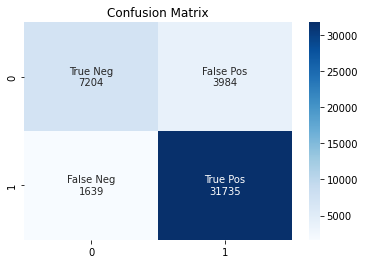

In [ ]:
# confusion matrix
cnfsn_train =metrics.confusion_matrix(y_train, y_prd_train)
print(cnfsn_train)
confusion_matrix(cnfsn_train) #plot confussion matrix

Confusion Matrix on Test Dataset.

[[ 2167  1631]
 [  536 10520]]


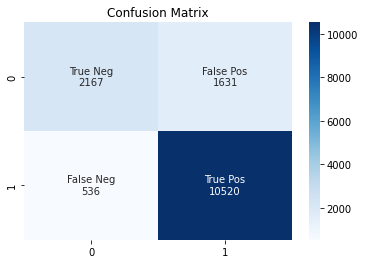

In [ ]:
# confusion matrix
cnfusn_test =metrics.confusion_matrix(y_test, y_prd_clas)
print(cnfusn_test)
confusion_matrix(cnfusn_test) # ploting confusion matrix

**Checking other Metrics**

In [ ]:
#allocating values for train dataset
TN_train = cnfsn_train[0, 0]
FP_train = cnfsn_train[0, 1]
FN_train = cnfsn_train[1, 0]
TP_train = cnfsn_train[1, 1]

In [ ]:
#allocating values for test dataset
TN_test = cnfusn_test[0, 0]
FP_test = cnfusn_test[0, 1]
FN_test = cnfusn_test[1, 0]
TP_test = cnfusn_test[1, 1]

**Other Metrics on Train Dataset**

In [ ]:
TPR_train = round((TP_train / float(FN_train + TP_train))*100,2)
print("Sensitivity :",TPR_train)

TNR_train = round((TN_train / float(TN_train + FP_train))*100,2)
print("Specificity :",TNR_train)

prcsn_train = round((TP_train / float(TP_train + FP_train))*100,2)
print("Precision   :",prcsn_train)

print("F1  SCORE   :",round((metrics.f1_score(y_train, y_prd_train))*100,2))

Sensitivity : 95.09
Specificity : 64.39
Precision   : 88.85
F1  SCORE   : 91.86


**Other metrics on test dataset**

In [ ]:
TPR_test = round((TP_test / float(FN_test + TP_test))*100,2)
print("Sensitivity :",TPR_test)

TNR_test = round((TN_test / float(TN_test + FP_test))*100,2)
print("Specificity :",TNR_test)

prcsn_test =round((TP_test / float(TP_test + FP_test))*100,2)
print("Precision   :",prcsn_test)

print("F1  SCORE   :",round((metrics.f1_score(y_test, y_prd_clas))*100,2))

Sensitivity : 95.15
Specificity : 57.06
Precision   : 86.58
F1  SCORE   : 90.66


In [ ]:
y_prd_clas

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_prd_prob

array([[0.00284867, 0.99715133],
       [0.20192699, 0.79807301],
       [0.02120905, 0.97879095],
       ...,
       [0.05146069, 0.94853931],
       [0.69703702, 0.30296298],
       [0.24128596, 0.75871404]])

**ROC Curve**

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prd_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
#area under the curve
print(roc_auc)

0.8987979430106027


In [ ]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.087192,0.003686
2,1.000000e+00,0.087735,0.003686
3,1.000000e+00,0.090087,0.003949
4,1.000000e+00,0.090358,0.003949
...,...,...,...
3075,1.906251e-25,0.999729,0.997367
3076,1.277088e-26,0.999819,0.997367
3077,1.034077e-36,0.999819,0.999210
3078,3.822881e-67,1.000000,0.999210


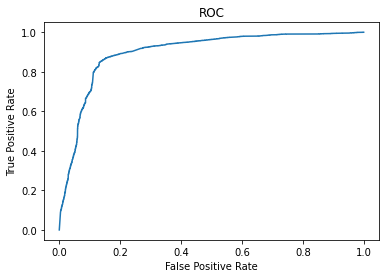

In [ ]:
#plotting ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

Here we have got a model with good values for both train and test dataset

Sensitivity : 95.09
Specificity : 64.39
Precision   : 88.85
F1  SCORE   : 91.86
 for train dataset 

And 

Sensitivity : 95.15
Specificity : 57.06
Precision   : 86.58
F1  SCORE   : 90.66   for test dataset.

Area under ROC Curve is 90%.

Hence from all this values we can conclude that the model is good.

